<h1>Exploratory Analysis of YouTube Channels and Videos Based on Educational and Entertainment Content</h1>

# 1. Introduction | Objectives | Approach | Data Source

## 1.1. Introduction

---YouTube Background info---

YouTube had it's humble beginnings starting out in

The first video uploaded was [Me at the zoo](https://www.youtube.com/watch?v=jNQXAC9IVRw). 

---YouTube Accomplishments---

---My Motivations---

I have been utilizing YouTube as a main source of entertainment and educational content for over a decade. This is my first instance of taking a deeper look at the statistics of top content creators I have followed previously, ocassionally, or currently. This project explores the educational and entertainment content from 10-20 successful YouTube channels.


## 1.2. Objectives

The project will strengthen my understanding and explores the following:

- Learning Youtube API | Navigating documentation | Obtaining video data
- Analyzing common misconceptions of becoming <b>"successful"</b> on YouTube
- Identify trending topics through Natural Language Processing (NLP) approaches


## 1.3. Approach
1. Obtain meta data with Youtube API from 10-15 channels in entertainment and education niches
2. Cleaning raw data and develop additional features for analysis (Pandas)
3. Exploratory analysis with data visualizations (Seaborn | Matplotlib)
4. Conclusions / Findings


## 1.4. Data Source
- Existing datasets online do not have the necessary information to perform exploratory analysis in this project. Some reasons include:
  - Outdated information
- Currently YouTube API service retains information from the past 30 days. The only way
to have more statistics beyond 30 days is to continuously scrape data until the information is required in the future.
 - The downside of this approach growing collection of data


In [1]:
# Imports
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON


# Data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Loading environment variable
import os
from dotenv import load_dotenv
load_dotenv()

# API_Key
api_key = os.environ.get('YOUTUBE_API_KEY')


# Example list of channel IDs
CHANNEL_IDS = [
  "UCX6OQ3DkcsbYNE6H8uQQuVA",     # Mr Beast
  "UC-lHJZR3Gqxm24_Vd_AJ5Yw",     # PewDiePie
  "UCINb0wqPz-A0dV9nARjJlOQ",     # The Dodo
  "UCshoKvlZGZ20rVgazZp5vnQ",     # CaptainSparklez
  "UCY1kMZp36IQSyNx_9h4mpCg",     # Mark Rober
  "UC6nSFpj9HTCZ5t-N3Rm3-HA",     # Vsauce
  "UCiDJtJKMICpb9B1qf7qjEOA",     # Adam Savage's Tested
  "UCsXVk37bltHxD1rDPwtNM8Q",     # Kurzgesagt – In a Nutshell
  "UCAL3JXZSzSm8AlZyD3nQdBA",     # Primitive Technology
]

SMALL_CHANNEL_IDS = [
  "UCX6OQ3DkcsbYNE6H8uQQuVA",     # Mr Beast
  "UCY1kMZp36IQSyNx_9h4mpCg",     # Mark Rober
  "UC6nSFpj9HTCZ5t-N3Rm3-HA",     # Vsauce
  "UCsXVk37bltHxD1rDPwtNM8Q",     # Kurzgesagt – In a Nutshell
  "UCAL3JXZSzSm8AlZyD3nQdBA",     # Primitive Technology
]


# Example playlist of all videos 
# ****Helpful -- (replace "UC" string from beginning of Channel Id with "UU")****
# https://www.youtube.com/playlist?list=
PLAYLIST_IDS = [
  'UUX6OQ3DkcsbYNE6H8uQQuVA'                # Mr Beast
  'PLoSWVnSA9vG9qV0CVCpg5WwEy3LiP7udY',     # Mr Beast (new uploads)
  'UULF-lHJZR3Gqxm24_Vd_AJ5Yw',             # PewDiePie
  'UUINb0wqPz-A0dV9nARjJlOQ',               # The Dodo
  'UUshoKvlZGZ20rVgazZp5vnQ',               # CaptainSparklez
  "UUY1kMZp36IQSyNx_9h4mpCg",               # Mark Rober
  "UU6nSFpj9HTCZ5t-N3Rm3-HA",               # Vsauce
  "UUiDJtJKMICpb9B1qf7qjEOA",               # Adam Savage's Tested
]

SMALL_PLAYLIST_IDS = [
  'UUX6OQ3DkcsbYNE6H8uQQuVA'                # Mr Beast
  'PLLoPYaJqlcK623-8kR0vVuwW_vaR2k1zE',               # The Dodo faith restored
  "UUY1kMZp36IQSyNx_9h4mpCg",               # Mark Rober
  "UU6nSFpj9HTCZ5t-N3Rm3-HA",               # Vsauce
]

api_service_name = "youtube"
api_version = "v3"
youtube = build(api_service_name, api_version, developerKey=api_key)

## Obtaining Basic Channel Stats
Looking at immediate/common information

In [2]:
def get_channel_stats(youtube, SMALL_CHANNEL_IDS):
  all_channel_data = []

  # https://developers.google.com/youtube/v3/docs/channels/list
  request = youtube.channels().list(
    part = 'snippet, contentDetails, statistics',
    id= ','.join(SMALL_CHANNEL_IDS)
  )
  response = request.execute()

  # https://developers.google.com/youtube/v3/docs/channels
  for item in response['items']:
    data = {
      'channelName': item['snippet']['title'],
      'creationDate': item['snippet']['publishedAt'],
      'subscribers': item['statistics']['subscriberCount'],
      'channelViews': item['statistics']['viewCount'],
      'totalVideos': item['statistics']['videoCount'],
      'playlistId': item['contentDetails']['relatedPlaylists']['uploads'],
    }

    all_channel_data.append(data)

  return(pd.DataFrame(all_channel_data))


In [3]:
quick_test_channels_stats = get_channel_stats(youtube, SMALL_CHANNEL_IDS)
quick_test_channels_stats

,channelName,creationDate,subscribers,channelViews,totalVideos,playlistId
0,Mark Rober,2011-10-20T06:17:58Z,25400000,3803813691,121,UUY1kMZp36IQSyNx_9h4mpCg
1,MrBeast,2012-02-20T00:43:50Z,182000000,31891273949,750,UUX6OQ3DkcsbYNE6H8uQQuVA
2,Primitive Technology,2015-05-01T23:35:46Z,10800000,1108647088,70,UUAL3JXZSzSm8AlZyD3nQdBA
3,Vsauce,2007-07-30T20:43:33Z,19800000,3114746867,477,UU6nSFpj9HTCZ5t-N3Rm3-HA
4,Kurzgesagt – In a Nutshell,2013-07-09T20:17:20Z,21100000,2433438330,191,UUsXVk37bltHxD1rDPwtNM8Q


## Obtaining Video IDs
This step is crucial as it narrows down where to focus on. Before collecting video Ids, we need to obtain a playlist Id.

On YouTube, an owner's channel has the liberty to create a playlist of videos they have uploaded or videos uploaded by other channels. In this analysis, we will use the default playlist "all uploads". We can obtain this playlist Id by swapping the beginning of the channel Id "UC" with "UU" [<b>REFER TO CELL 1 ABOVE</b>]

Sometimes we do not want all video uploads playlist. Instead, we can use other playlists granted if owner created or not privated them.
<br>*---Important: Channel owner can create a playlist of videos that are not uploaded by themselves / Carefully look at the uploader of video---*

After choosing a playlist, we finally proceed to obtaining video ids. Each video has its own unique id for conclusive identification. Having a playlist ensures that all the videos uploaded from the channel owner is related and theirs.


In [4]:

# ***Note: This is only needed if you want to see how many videos/video ids are in a single playlist
#playlist_id = "UUY1kMZp36IQSyNx_9h4mpCg"      # "UUY1kMZp36IQSyNx_9h4mpCg"

#------------------------------------------------------------------------------#
def get_video_ids(youtube, playlist_id):
  video_ids = []

  request = youtube.playlistItems().list(
  part='snippet,contentDetails',
  playlistId=playlist_id,
  maxResults=50       # default is 5 video ids
  )
  response = request.execute()

  for item in response['items']:
    video_ids.append(item['contentDetails']['videoId'])
  
  next_page_token = response.get('nextPageToken')
  while next_page_token is not None:
    request = youtube.playlistItems().list(
      part='snippet,contentDetails',
      playlistId=playlist_id,
      maxResults=50,       # default is 5 video ids
      pageToken = next_page_token
    )
    response = request.execute()

    for item in response['items']:
      video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')

  return video_ids

In [5]:
# video_ids = get_video_ids(youtube, playlist_id)
# len(video_ids)

## Obtaining Video Information
After collecting specific video ids, we can finally dive deeper into the videos themselves and look at the finer details

Each meta data falls under a certain category
Using the following: [--Insert link--], we are able to specify which data/item to request through the YouTube API


In [6]:

def get_video_details(youtube, video_ids):
  all_video_info = []

  for i in range(0, len(video_ids), 50):
    request = youtube.videos().list(
      part='snippet,contentDetails,statistics',
      id=','.join(video_ids[i:i+50])
    )
    response = request.execute()

    for video in response['items']:
      intended_stats = {
        'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
        'contentDetails': ['duration', 'definition', 'caption'],
        'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
      }

      video_info = {}
      video_info['video_id'] = video['id']

      for k in intended_stats.keys():
        for v in intended_stats[k]:
          try:
            video_info[v] = video[k][v]
          except:
            video_info[v] = None

      all_video_info.append(video_info)

  return pd.DataFrame(all_video_info)

In [7]:
# This dataframe is accessible after uncommenting codes under "Obtaining Video IDs" section
# This shows all video ids in single playlist

# video_info_df = get_video_details(youtube, video_ids)
# video_info_df

In [8]:
channel_data = get_channel_stats(youtube, SMALL_CHANNEL_IDS)
channel_data

,channelName,creationDate,subscribers,channelViews,totalVideos,playlistId
0,Mark Rober,2011-10-20T06:17:58Z,25400000,3803813691,121,UUY1kMZp36IQSyNx_9h4mpCg
1,Vsauce,2007-07-30T20:43:33Z,19800000,3114746867,477,UU6nSFpj9HTCZ5t-N3Rm3-HA
2,Kurzgesagt – In a Nutshell,2013-07-09T20:17:20Z,21100000,2433438330,191,UUsXVk37bltHxD1rDPwtNM8Q
3,Primitive Technology,2015-05-01T23:35:46Z,10800000,1108647088,70,UUAL3JXZSzSm8AlZyD3nQdBA
4,MrBeast,2012-02-20T00:43:50Z,182000000,31891273949,750,UUX6OQ3DkcsbYNE6H8uQQuVA


## Appending all videos from different channels together
<p>The joy of fusing all the video data together!</p>

In [9]:

video_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
	print("Getting video information from channel: " + c)
	playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
	video_ids = get_video_ids(youtube, playlist_id)

	# get video data
	video_data = get_video_details(youtube, video_ids)


	# append video data together and comment data toghether
	#video_df = video_df.append(video_data, ignore_index=True)
	#video_df = pd.concat([video_df, pd.DataFrame([video_data])]), ignore_index=True)
	video_df = video_df._append(video_data, ignore_index=True)


Getting video information from channel: Mark Rober
Getting video information from channel: Vsauce
Getting video information from channel: Kurzgesagt – In a Nutshell
Getting video information from channel: Primitive Technology
Getting video information from channel: MrBeast


In [10]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount
0,lcIObyvI3uw,Mark Rober,This Ball Is Impossible To Hit,,None,2023-08-11T22:06:05Z,PT43S,hd,false,8096178,421108,0,534
1,0ENZe0ckmxA,Mark Rober,I Cured @MrBeast’s Fear Of Heights,,None,2023-06-29T20:47:19Z,PT1M,hd,false,42424620,3114226,0,4722
2,md75n8cyenA,Mark Rober,How to Escape a Police Sniffing Dog,Scent trailing dogs are indistinguishable from...,None,2023-06-21T21:04:23Z,PT27M37S,hd,true,14312628,428381,0,12343
3,-K8xL6laeEU,Mark Rober,Public shaming at a Sharks game,,None,2023-06-11T18:55:15Z,PT1M1S,hd,false,25334891,1616309,0,6617
4,1UTjWy-vnOo,Mark Rober,I Gave the 2023 MIT Commencement Speech,,None,2023-06-10T14:00:02Z,PT19M31S,hd,true,4929537,193741,0,4265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,"[psy, minecraft, epic, skin, most, ever]",2013-01-13T01:59:21Z,PT31S,hd,false,778789,30984,0,3004
1606,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,"[birds, minecraft, in, more, must, see, epic]",2013-01-12T23:35:45Z,PT2M6S,hd,false,906537,36233,0,3299
1607,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,"[boxy, item, mod, minecraft, epic]",2013-01-12T22:34:11Z,PT1M30S,hd,false,1076642,42977,0,3975
1608,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,"[Harry Potter minecraft, minecraft, minecraft ...",2012-03-09T23:29:03Z,PT3M59S,hd,false,3808585,None,0,7808


## Data Pre-Process / Cleaning Up

In [11]:
# Data Types
print(video_df.dtypes)

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
duration         object
definition       object
caption          object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
dtype: object


In [12]:
# Null Values
print(video_df.isnull().any())

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
duration         False
definition       False
caption          False
viewCount         True
likeCount         True
favoriteCount    False
commentCount      True
dtype: bool


In [13]:
# Converting the following table headers to numerical data type
# (from --- parameter part: statistics)
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [14]:
# Make video duration more clear (days / hour:minute:seconds)
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x :isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

video_df[['duration', 'durationSecs']]

,duration,durationSecs
0,PT43S,0 days 00:00:43
1,PT1M,0 days 00:01:00
2,PT27M37S,0 days 00:27:37
3,PT1M1S,0 days 00:01:01
4,PT19M31S,0 days 00:19:31
...,...,...
1605,PT31S,0 days 00:00:31
1606,PT2M6S,0 days 00:02:06
1607,PT1M30S,0 days 00:01:30
1608,PT3M59S,0 days 00:03:59


In [15]:
# Create "day" and "month" columns based on publish date
video_df['dayPublished'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%a')
video_df['monthPublished'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%b')

In [16]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,duration,definition,caption,viewCount,likeCount,favoriteCount,commentCount,durationSecs,dayPublished,monthPublished
0,lcIObyvI3uw,Mark Rober,This Ball Is Impossible To Hit,,None,2023-08-11T22:06:05Z,PT43S,hd,false,8096178.0,421108.0,0.0,534.0,0 days 00:00:43,Fri,Aug
1,0ENZe0ckmxA,Mark Rober,I Cured @MrBeast’s Fear Of Heights,,None,2023-06-29T20:47:19Z,PT1M,hd,false,42424620.0,3114226.0,0.0,4722.0,0 days 00:01:00,Thu,Jun
2,md75n8cyenA,Mark Rober,How to Escape a Police Sniffing Dog,Scent trailing dogs are indistinguishable from...,None,2023-06-21T21:04:23Z,PT27M37S,hd,true,14312628.0,428381.0,0.0,12343.0,0 days 00:27:37,Wed,Jun
3,-K8xL6laeEU,Mark Rober,Public shaming at a Sharks game,,None,2023-06-11T18:55:15Z,PT1M1S,hd,false,25334891.0,1616309.0,0.0,6617.0,0 days 00:01:01,Sun,Jun
4,1UTjWy-vnOo,Mark Rober,I Gave the 2023 MIT Commencement Speech,,None,2023-06-10T14:00:02Z,PT19M31S,hd,true,4929537.0,193741.0,0.0,4265.0,0 days 00:19:31,Sat,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,"[psy, minecraft, epic, skin, most, ever]",2013-01-13T01:59:21Z,PT31S,hd,false,778789.0,30984.0,0.0,3004.0,0 days 00:00:31,Sun,Jan
1606,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,"[birds, minecraft, in, more, must, see, epic]",2013-01-12T23:35:45Z,PT2M6S,hd,false,906537.0,36233.0,0.0,3299.0,0 days 00:02:06,Sat,Jan
1607,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,"[boxy, item, mod, minecraft, epic]",2013-01-12T22:34:11Z,PT1M30S,hd,false,1076642.0,42977.0,0.0,3975.0,0 days 00:01:30,Sat,Jan
1608,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,"[Harry Potter minecraft, minecraft, minecraft ...",2012-03-09T23:29:03Z,PT3M59S,hd,false,3808585.0,NaN,0.0,7808.0,0 days 00:03:59,Fri,Mar


## Exploratory Analysis
### Most Views

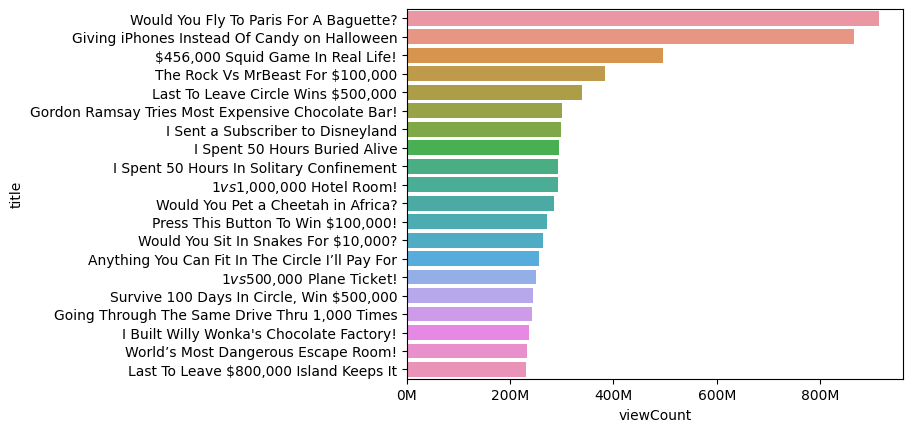

In [17]:
ax1 = sns.barplot(x='viewCount', y='title', data=video_df.sort_values('viewCount', ascending=False)[0:20])
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'{:,.0f}'.format(y/1000000) + 'M'))
plt.show()